In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [45]:
# Định nghĩa đường dẫn thư mục
capno_dir = r"C:\Users\ngocd\Iot\Test\CapnoBIMDC\CapnoIEEE\CapnoIEEE_csv"
bidmc_dir = r"C:\Users\ngocd\Iot\Test\CapnoBIMDC\bidmc\bidmc_csv"

# Lấy danh sách các file trong từng thư mục
capno_files = [f for f in os.listdir(capno_dir) if f.endswith('.csv')]
bidmc_files = [f for f in os.listdir(bidmc_dir) if f.endswith('.csv')]

print("Sample CapnoIEEE files:")
for file in capno_files[:5]:
    print(f"  - {file}")

print("Sample BIDMC files:")
for file in bidmc_files[:5]:
    print(f"  - {file}")

# Đọc file tín hiệu từ CapnoIEEE
capno_signal_file = next((f for f in capno_files if "_signal.csv" in f), None)
if capno_signal_file:
    capno_signal_path = os.path.join(capno_dir, capno_signal_file)
    capno_signal_df = pd.read_csv(capno_signal_path)
    print(f"\nCapnoIEEE signal file structure ({capno_signal_file}):")
    print(capno_signal_df.head())
    print(f"Shape: {capno_signal_df.shape}")

# Đọc file tham chiếu từ CapnoIEEE
capno_reference_file = next((f for f in capno_files if "_reference.csv" in f), None)
if capno_reference_file:
    capno_reference_path = os.path.join(capno_dir, capno_reference_file)
    capno_reference_df = pd.read_csv(capno_reference_path)
    print(f"\nCapnoIEEE reference file structure ({capno_reference_file}):")
    print(capno_reference_df.head())
    print(f"Shape: {capno_reference_df.shape}")

# Đọc file tín hiệu từ BIDMC
bidmc_signal_file = next((f for f in bidmc_files if "_Signals.csv" in f), None)
if bidmc_signal_file:
    bidmc_signal_path = os.path.join(bidmc_dir, bidmc_signal_file)
    bidmc_signal_df = pd.read_csv(bidmc_signal_path)
    print(f"\nBIDMC signal file structure ({bidmc_signal_file}):")
    print(bidmc_signal_df.head())
    print(f"Shape: {bidmc_signal_df.shape}")

# Đọc file thông số từ BIDMC
bidmc_numerics_file = next((f for f in bidmc_files if "_Numerics.csv" in f), None)
if bidmc_numerics_file:
    bidmc_numerics_path = os.path.join(bidmc_dir, bidmc_numerics_file)
    bidmc_numerics_df = pd.read_csv(bidmc_numerics_path)
    print(f"\nBIDMC numerics file structure ({bidmc_numerics_file}):")
    print(bidmc_numerics_df.head())
    print(f"Shape: {bidmc_numerics_df.shape}")

# Đọc file nhịp thở từ BIDMC
bidmc_breaths_file = next((f for f in bidmc_files if "_Breaths.csv" in f), None)
if bidmc_breaths_file:
    bidmc_breaths_path = os.path.join(bidmc_dir, bidmc_breaths_file)
    bidmc_breaths_df = pd.read_csv(bidmc_breaths_path)
    print(f"\nBIDMC breaths file structure ({bidmc_breaths_file}):")
    print(bidmc_breaths_df.head())
    print(f"Shape: {bidmc_breaths_df.shape}")

print("\nData exploration completed!")

Sample CapnoIEEE files:
  - 0009_8min_labels.csv
  - 0009_8min_meta.csv
  - 0009_8min_param.csv
  - 0009_8min_reference.csv
  - 0009_8min_SFresults.csv
Sample BIDMC files:
  - bidmc_01_Breaths.csv
  - bidmc_01_Numerics.csv
  - bidmc_01_Signals.csv
  - bidmc_02_Breaths.csv
  - bidmc_02_Numerics.csv

CapnoIEEE signal file structure (0009_8min_signal.csv):
   co2_y  pleth_y  ecg_y
0   1.50    -0.64  -0.31
1   1.54    -0.64  -0.34
2   1.59    -0.67  -0.31
3   1.64    -0.69  -0.26
4   1.68    -0.72  -0.18
Shape: (144001, 3)

CapnoIEEE reference file structure (0009_8min_reference.csv):
                                            rr_co2_x  \
0   21.5333 24.87 28.1567 31.5267 34.7867 38.2333...   

                                            rr_co2_y  \
0   17.982 17.982 18.2556 17.8042 18.4049 17.4081...   

                                          hr_pleth_x  \
0   0.806667 1.40667 2.03667 2.66667 3.27667 3.85...   

                                          hr_pleth_y  \
0   98.3607 100 9

Extracting data from CapnoIEEE dataset...


Processing CapnoIEEE files: 100%|██████████████████████████████████████████████████████| 42/42 [00:01<00:00, 26.49it/s]


Extracting data from BIDMC dataset...


Processing BIDMC files: 100%|██████████████████████████████████████████████████████████| 53/53 [00:01<00:00, 33.20it/s]


Total extracted signals: 18456
Total extracted parameters: 18456


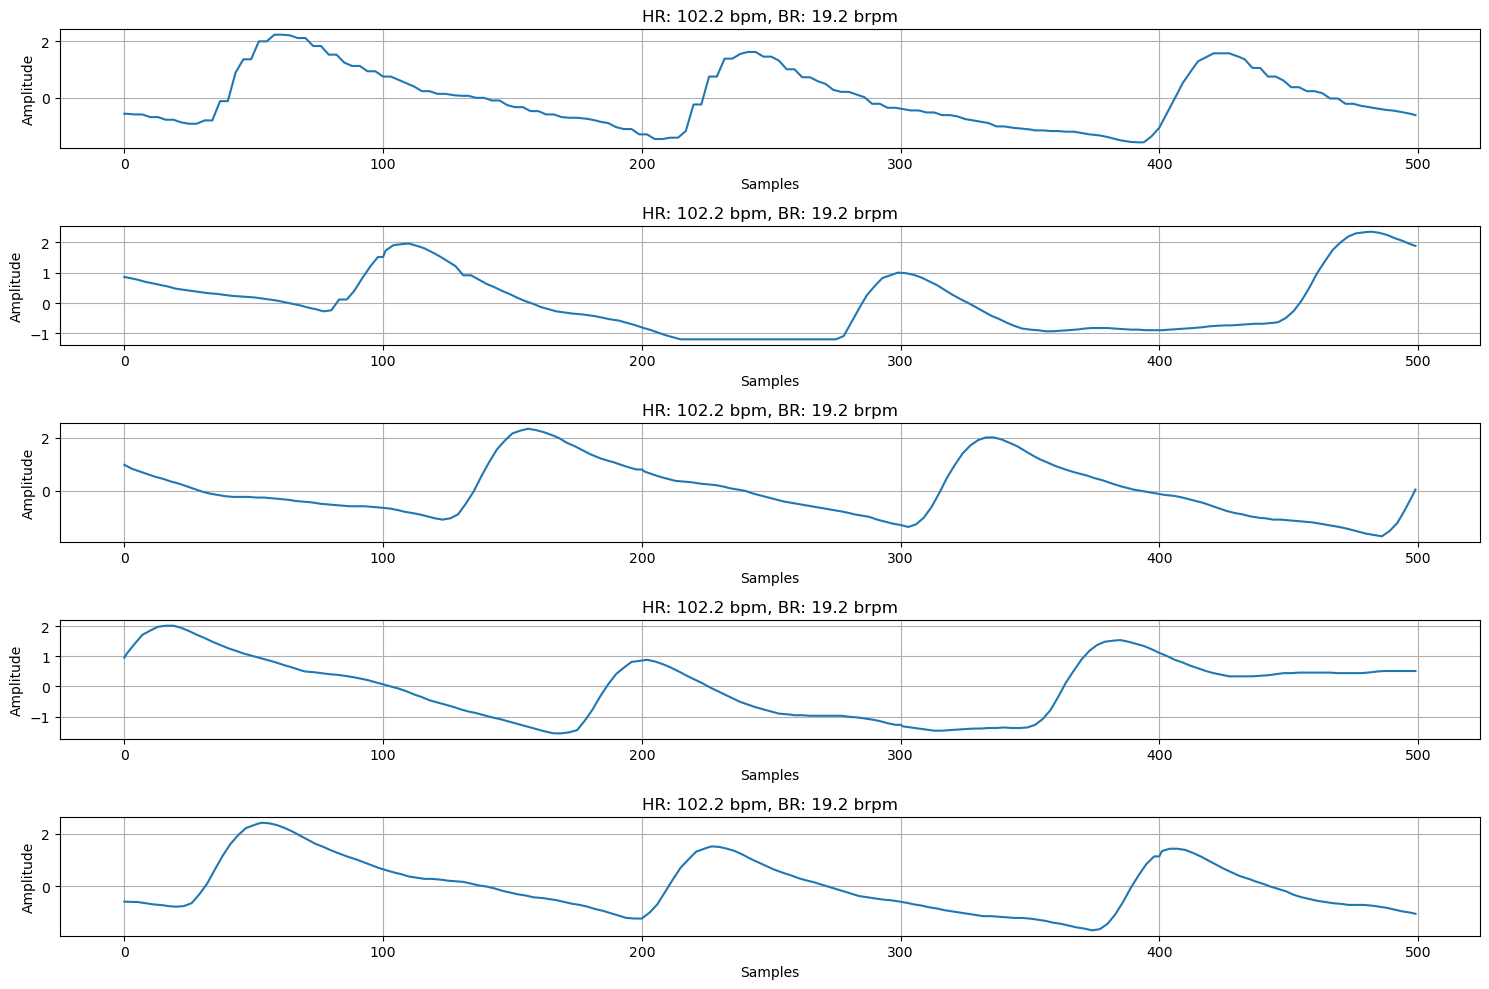

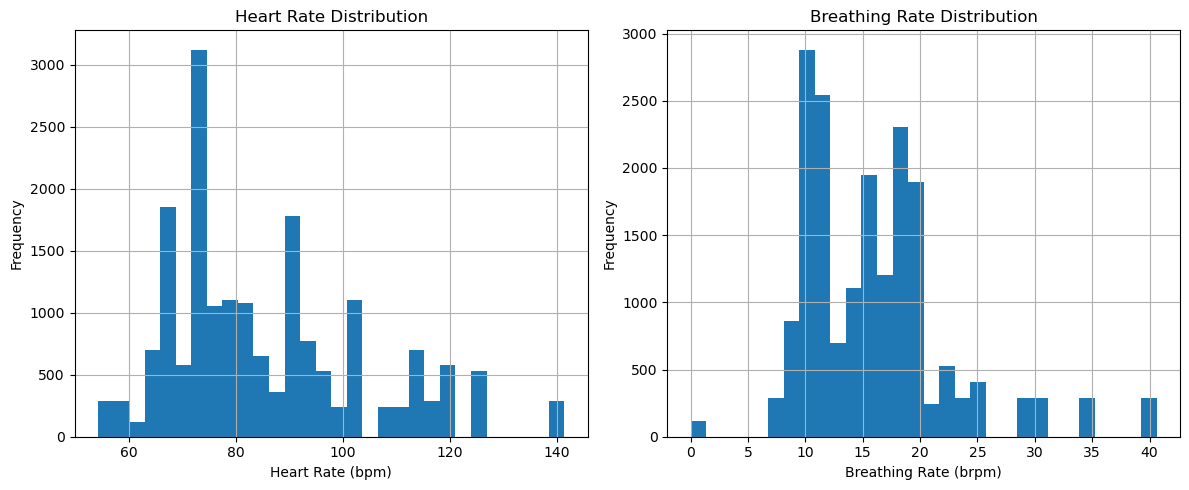

Data extraction and visualization completed!


In [102]:
# Now let's extract and process the PPG signals and corresponding HR/BR values
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from tqdm import tqdm

# Function to extract PPG signals and parameters from CapnoIEEE dataset
def extract_capno_data(base_path=r"C:\Users\ngocd\Iot\Test\CapnoBIMDC\CapnoIEEE\CapnoIEEE_csv", sample_length=500, fs=125):
    """
    Extract PPG signals and parameters from CapnoIEEE dataset

    Args:
        base_path: Path to the dataset
        sample_length: Length of each signal sample
        fs: Sampling frequency

    Returns:
        signals: Extracted PPG signals
        params: Corresponding HR and BR parameters
    """
    signals = []
    params = []

    # Get all signal files
    signal_files = [f for f in os.listdir(base_path) if f.endswith('_signal.csv')]

    for signal_file in tqdm(signal_files, desc="Processing CapnoIEEE files"):
        # Extract subject ID
        subject_id = signal_file.split('_')[0]

        # Load signal data
        signal_df = pd.read_csv(os.path.join(base_path, signal_file))

        # Extract PPG signal (pleth_y column)
        if 'pleth_y' in signal_df.columns:
            ppg_signal = signal_df['pleth_y'].values

            # Find corresponding reference file
            reference_file = f"{subject_id}_8min_reference.csv"
            if os.path.exists(os.path.join(base_path, reference_file)):
                reference_df = pd.read_csv(os.path.join(base_path, reference_file))

                # Extract HR and BR from reference data
                # Note: This is a simplification, actual extraction would depend on the exact format
                if 'hr_pleth_y' in reference_df.columns and 'rr_co2_y' in reference_df.columns:
                    # Extract HR and BR values (using first value as an example)
                    try:
                        hr_str = reference_df['hr_pleth_y'].iloc[0]
                        rr_str = reference_df['rr_co2_y'].iloc[0]

                        # Parse the string values
                        hr_values = [float(val) for val in str(hr_str).split() if val.replace('.', '', 1).isdigit()]
                        rr_values = [float(val) for val in str(rr_str).split() if val.replace('.', '', 1).isdigit()]

                        if hr_values and rr_values:
                            hr = np.mean(hr_values)
                            rr = np.mean(rr_values)

                            # Segment the signal into samples
                            for i in range(0, len(ppg_signal) - sample_length, sample_length):
                                segment = ppg_signal[i:i+sample_length]

                                # Normalize the segment
                                segment = (segment - np.mean(segment)) / (np.std(segment) + 1e-8)

                                signals.append(segment)
                                params.append([hr, rr])
                    except Exception as e:
                        print(f"Error processing {reference_file}: {e}")

    return np.array(signals), np.array(params)

# Function to extract PPG signals and parameters from BIDMC dataset
def extract_bidmc_data(base_path=r"C:\Users\ngocd\Iot\Test\CapnoBIMDC\bidmc\bidmc_csv", sample_length=500, fs=125):
    """
    Extract PPG signals and parameters from BIDMC dataset

    Args:
        base_path: Path to the dataset
        sample_length: Length of each signal sample
        fs: Sampling frequency

    Returns:
        signals: Extracted PPG signals
        params: Corresponding HR and BR parameters
    """
    signals = []
    params = []

    # Get all signal files
    signal_files = [f for f in os.listdir(base_path) if f.endswith('_Signals.csv')]

    for signal_file in tqdm(signal_files, desc="Processing BIDMC files"):
        # Extract subject ID
        subject_id = signal_file.split('_')[1]

        # Load signal data
        signal_df = pd.read_csv(os.path.join(base_path, signal_file))

        # Extract PPG signal (PLETH column)
        if ' PLETH' in signal_df.columns:
            ppg_signal = signal_df[' PLETH'].dropna().values  # Bỏ giá trị NaN nếu có

            # Find corresponding numerics file
            numerics_file = f"bidmc_{subject_id}_Numerics.csv"
            if os.path.exists(os.path.join(base_path, numerics_file)):
                numerics_df = pd.read_csv(os.path.join(base_path, numerics_file))

                try:
                    # Extract HR and RESP directly from the DataFrame
                    if ' HR' in numerics_df.columns and ' RESP' in numerics_df.columns:
                        hr_values = numerics_df[' HR'].dropna().values
                        resp_values = numerics_df[' RESP'].dropna().values

                        if len(hr_values) > 1 and len(resp_values) > 1:
                            # Lấy giá trị trung vị để giảm nhiễu
                            hr = np.median(hr_values)
                            rr = np.median(resp_values)

                            # Segment the signal into samples
                            for i in range(0, len(ppg_signal) - sample_length, sample_length):
                                segment = ppg_signal[i:i+sample_length]

                                # Normalize the segment
                                segment = (segment - np.mean(segment)) / (np.std(segment) + 1e-8)

                                signals.append(segment)
                                params.append([hr, rr])
                except Exception as e:
                    print(f"Error processing {numerics_file}: {e}")

    return np.array(signals), np.array(params)
# Extract data from both datasets
print("Extracting data from CapnoIEEE dataset...")
capno_signals, capno_params = extract_capno_data()

print("Extracting data from BIDMC dataset...")
bidmc_signals, bidmc_params = extract_bidmc_data()

# Combine data from both datasets
signals = np.vstack([capno_signals, bidmc_signals]) if len(capno_signals) > 0 and len(bidmc_signals) > 0 else (capno_signals if len(capno_signals) > 0 else bidmc_signals)
params = np.vstack([capno_params, bidmc_params]) if len(capno_params) > 0 and len(bidmc_params) > 0 else (capno_params if len(capno_params) > 0 else bidmc_params)

print(f"Total extracted signals: {len(signals)}")
print(f"Total extracted parameters: {len(params)}")

# Save the extracted data
np.save('./ppg_data.npy', signals)
np.save('./ppg_params.npy', params)

# Plot some example signals
plt.figure(figsize=(15, 10))
for i in range(min(5, len(signals))):
    plt.subplot(5, 1, i+1)
    plt.plot(signals[i])
    plt.title(f'HR: {params[i][0]:.1f} bpm, BR: {params[i][1]:.1f} brpm')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.grid(True)

plt.tight_layout()
plt.savefig('./ppg_samples.png')
plt.show()

# Plot the distribution of HR and BR values
plt.figure(figsize=(12, 5))



plt.subplot(1, 2, 1)
plt.hist(params[:, 0], bins=30)
plt.title('Heart Rate Distribution')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(params[:, 1], bins=30)
plt.title('Breathing Rate Distribution')
plt.xlabel('Breathing Rate (brpm)')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.savefig('./hr_br_distribution.png')
plt.show()

print("Data extraction and visualization completed!")